# Data Prepartion - IMDb Dataset

This notebook prepares the IMDb files chosen for analysis to be merged with data from other sources. The result will be a sngle dataframe saved to disk as a CSV.

## Data Selection

The IMDb title basics and title ratings files have been chosen for further analysis. The basics file contains two relevant features for analysis in genres and runtime, as well as movie title and year. The ratings file contains two worthwhile targets in average rating and number of votes. These metrics are interesting for further investigation of their relevance to the problem of what movies Microsoft's new studio should make.

In [40]:
# import the relevant packages and load the files
import pandas as pd

basics = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
ratings = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')

In [41]:
# check to make sure the data loaded as expected
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [42]:
# check to make sure the data loaded as expected
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Join the DataFrames

The two DataFrames will be joined on the `tconst` field, a unique identifier for each movie title.

In [43]:
# check the length of tconst
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [44]:
# check the length of tconst
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [45]:
# check if each tconst is distinct
len(basics['tconst'].unique())

146144

In [46]:
# check if each tconst is distinct
len(ratings['tconst'].unique())

73856

There are fewer records of movies in the ratings table than the basics table. Both tables have completely distinct records. These tables should be **outer joined** to preserve information about movies that don't have an IMDb rating. *This information could still be useful after the merge with data from other sources.*

In [47]:
# set the index to the tconst column to join them
imdb = basics.set_index('tconst').join(ratings.set_index('tconst'), how='outer')

# check to see if join went as expected
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [48]:
# check the number of records and if there are missing values for averagerating and numvotes
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.9+ MB


## Create new ID

The tables have been merged. All records remain intact, while there are some expected missing values for the averagerating and numvotes columns. Currently, the index is set to an id specified by the `tconst` column. In order to join this IMDb data with other sources, a new ID will need to be created. `tconst` is unique to the IMDb data. The new ID will be a string containing the name of the movie and its release year.

In [49]:
# take a look at the current format
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [50]:
# create new column and remove any leading or trailing whitespace in the title
imdb['movie_id'] = imdb['primary_title'].str.strip()

# convert titles to lowercase
imdb['movie_id'] = imdb['movie_id'].str.lower()

# check result
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,sunghursh
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,one day before the rainy season
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,the other side of the wind
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,sabse bada sukh
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,the wandering soap opera


In [51]:
# append the year to the movie_id
imdb['movie_id'] = imdb['movie_id'] + imdb['start_year'].astype(str)

# check result
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,sunghursh2013
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,one day before the rainy season2019
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,the other side of the wind2018
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,sabse bada sukh2018
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,the wandering soap opera2017


In [52]:
# set the index to the new movie_id
imdb = imdb.set_index('movie_id')

#check result
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,,,
sunghursh2013,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
the other side of the wind2018,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
sabse bada sukh2018,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
the wandering soap opera2017,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


## Drop unnecessary columns

The new index has been created, consisting of the lowercase name of the movie with the year appended at the end. The IMDb data is almost ready to be joined with other data sources. Now that the year has been included in the index, it is no longer needed for analysis. Let's drop that column. The original_title column will also be dropped as only the primary_title is necessary for further analysis. The original_title is the title in its original language.

In [53]:
# drop the original_title column, but keep all rows
imdb = imdb.drop(['original_title', 'start_year'], axis=1)

# check the result
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, sunghursh2013 to chico albuquerque - revelações2013
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   runtime_minutes  114405 non-null  float64
 2   genres           140736 non-null  object 
 3   averagerating    73856 non-null   float64
 4   numvotes         73856 non-null   float64
dtypes: float64(3), object(2)
memory usage: 6.7+ MB


In [54]:
# take a look
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43.0
the other side of the wind2018,The Other Side of the Wind,122.0,Drama,6.9,4517.0
sabse bada sukh2018,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13.0
the wandering soap opera2017,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119.0


## Save as a CSV file

In [55]:
# save as csv file
imdb.to_csv('imdb_data')

## Summary

The IMDb data is now ready to be joined with data from other sources. The two original tables have been joined, a new movie id index has been created, and columns unnecessary for further analysis have been dropped. With the new csv file, we'll next attempt to join other data on the new movie id index.


# Matthew's EDA


Specifically mention purpose

**Stakeholder**: Microsoft's new movie studio head 

**Problem**: What type of films should the studio create? 

**Subproblem**: What films are doing "the best at the box office?" How can this studio compete with original video content from other "big companies?"

In [1]:
# Import packages for exploration
import pandas as pd
import numpy as np


## Rotten Tomatoes

Rotten tomatoes is a review-aggregation website and database for movies.

In [3]:
# This file is a TSV so the seperator should be set to '\t' and it is encoded using 'latin-1'
rt_reviews = pd.read_csv('../Data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
rt_movie_info = pd.read_csv('../Data/zippedData/rt.movie_info.tsv.gz', sep='\t', encoding='latin-1')


### Movie Info


In [4]:
# Visually confirming table was read properly
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
# Making observations based on table metadata
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


**Notes:**  
1. Columns 8, 9, and 11 seem to contain significantly more NaN values then the other columns.
2. Rating is the MPAA rating
3. 'theater_date' and 'dvd_date' not datetime objects
4. 'box_Office' appears to be the money made at the box office, but is not an integer/float
5. There is NO name assosiated with this table. Movies seem to be identified by 'id'


### REVIEWS


In [6]:
# Visually confirming table was read properly
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
# Making observations based on table metadata
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


**Notes:**  
1. ID seems to be a foreign key in this table. There is still no way to identify the NAME of the movie outside of speculation, though it may be irrelevant.
2. Top critic appears to be a boolean value.
3. Rating seems to be a fraction out of 5. Will need to convert to float.
4. 'Data' column not 'datetime' object.

## Final Rotten Tomato Notes

There is a great deal of useful statistics in here. If the two Rotten Tomato tables are joined a great deal of observations could be made.

1. Critic ratings based on genre  
2. Box office earnings by rating (MPAA)  
3. Rating by Runtime  
4. Writers / Directors who result in the most box office   revenue  

These are all examples of statistics that could be used to recommend actions to the head of the studio like:

1. What kind of Genre is most likely to Rate well
2. What kind of movie rating (MPAA) is most likley to make the most box office earnings
3. The target length for a movie to get the highest rating.
4. What kind of writers or directors to hire.

**Limitiations**
- The box office column has a severe amount of null values. About 80% of the entries are missing their 'box office' value.

Even without the box office column, this dataset could provide plenty of other reccomendations with the other data.


### The Movie DB

The Movie DB is a user editable database for movies and TV shows.

In [20]:
# Open and assign data to a dataframe.
tmdb = pd.read_csv('../Data/zippedData/tmdb.movies.csv.gz')

In [21]:
# Visually confirm table was read properly
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [22]:
# There appears to be an index column already in this table. I will drop the column rather then re-read the file.
tmdb.drop(axis= 1, labels='Unnamed: 0', inplace=True)

#Re-check table
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


**Notes:**  
1. No null values.
2. Genre_ids looks like a list of numbers that corrosponds to a genre.
3. vote_average and vote_count looks to be about user ratings.
4. Immedietly it may be intresting to look at the relationship between 'popularity' and 'vote_average'

[Popularity](https://developers.themoviedb.org/3/getting-started/popularity) seems to be a unique metric for calculating how popular an entry is based on recent user interaction with the entry 

In [24]:
# Lets look at some general stats for the integer columns
tmdb.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [25]:
# The 'popularity' mean value looks a little off to me. Let's check the column for irregularities.
tmdb['popularity'].value_counts()

0.600     7037
1.400      649
0.840      587
0.624      104
0.625       92
          ... 
3.742        1
14.749       1
7.924        1
8.414        1
9.060        1
Name: popularity, Length: 7425, dtype: int64

**Notes**  
It seems to me that '0.600' may be a placeholder value due to the sheer number of occurances.

In [26]:
# The 'popularity' column has made me suspicous, so now lets check the 'vote_count' column
tmdb['vote_count'].value_counts()

1       6541
2       3044
3       1757
4       1347
5        969
        ... 
2328       1
6538       1
489        1
2600       1
2049       1
Name: vote_count, Length: 1693, dtype: int64

In [28]:
# It is certainly possible that there are 6541 movies with 1 vote, but it feels unlikely.
tmdb[tmdb['vote_count'] == 1]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
770,"[28, 80, 18, 53]",51488,en,Full Love,2.288,2010-01-01,Full Love,10.0,1
873,"[878, 27]",27485,en,Megaconda,1.960,2010-01-01,Megaconda,7.0,1
1004,"[12, 80]",76747,ru,Burning Daylight,1.588,2010-11-14,Burning Daylight,6.0,1
1008,"[16, 10751]",52272,en,Bratz: Pampered Petz,1.579,2010-10-05,Bratz: Pampered Petz,5.0,1
1063,"[9648, 53]",295682,en,Bright Falls,1.400,2010-04-27,Bright Falls,9.0,1
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


**Notes**  
Multiple issues discovered here, vote_average, vote_count and popularity all seem to have placeholder values.

## Final The Movie DB Notes

**Example Observations:**

1. User rating (vote_average) based on genre
2. Most common words in the title of the movies with the highest user rating (vote_average)

These are all examples of statistics that could be used to recommend actions to the head of the studio like:

1. What kind of film genre is most likely to rate well
2. What kind of words should be put in the movies title

**Limitiations**
- The box office column has a severe amount of null values. About 80% of the entries are missing their 'box office' value.
- The 'vote_count', 'vote_average', and 'popularity' all have some form of placeholder values.

The data here would require heavy cleaning, but is far from unusable.

# Matthew's Data Cleaning

**In this notebook I will be cleaning "The Movie DB" dataset (tmdb.movies.csv.gz)  for it to be merged into the master table**  

After talking with the group it was decided that we would merge our tables together into a "master table" using what we decided were [relevant columns](https://docs.google.com/spreadsheets/d/1FrTlLWIb5fVswDBTqliIks8QU7fY97RTtus5--7r_q4/edit#gid=596077008). Of the two datasets I explored, it was decided that we would keep data from "The Movie DB" dataset. The kept columns from the table will be:

**Keeping**

- release_date
- original_title
- vote_average
- vote_count
- popularity 

**Creating**

- movie_id
- release_month

and a column called "movie_id" will be created by combining the 'original_title' and the year from the'release_date' column. This column will be used as a key when creating the master 'table. release_month' column will be used in future analysis.

In [160]:
# Import packages for Cleaning
import pandas as pd
import numpy as np

In [161]:
# There is an index column in this data so I set the parameter 'index_col' to 1.
tmdb = pd.read_csv('../Data/zippedData/tmdb.movies.csv.gz', index_col=0)

In [162]:
# Visually confirm no issues with import.
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Selecting Desired Columns

In [163]:
# First, I'm going to drop the columns that we decided not to use: 'genre_ids', 'id', and 'original_language'
tmdb.drop(columns=['genre_ids', 'id','original_language'], inplace=True)

In [164]:
# Before dropping one of them, I'm going to check the differences between 'original_title' and 'title'
tmdb[tmdb['original_title'] != tmdb['title']]

,original_title,popularity,release_date,title,vote_average,vote_count
14,Saw 3D,20.370,2010-10-28,Saw: The Final Chapter,6.0,1488
49,Tres metros sobre el cielo,13.721,2010-12-20,Three Steps Above Heaven,7.5,960
67,Arthur 3: la guerre des deux mondes,12.679,2010-08-22,Arthur 3: The War of the Two Worlds,5.6,865
70,El secreto de sus ojos,12.531,2010-04-16,The Secret in Their Eyes,7.9,1141
75,サマーウォーズ,12.275,2010-10-13,Summer Wars,7.5,447
...,...,...,...,...,...,...
26409,你好，之华,0.600,2018-11-09,Last Letter,6.0,1
26422,El verano del león eléctrico,0.600,2018-11-12,The Summer of the Electric Lion,6.0,1
26432,Contes de Juillet,0.600,2018-03-09,July Tales,6.0,1
26494,La última virgen,0.600,2018-05-26,The Last Virgin,2.0,1


It looks like 'original_title' is either  
1. The title of the movie in its original language
2. The 'prototype' or 'working' title for the movie

I'm going to keep the 'title' column instead, as keeping the 'original_title' column will create problems when creating the 'movie_id' column later.

In [165]:
tmdb.drop(columns='original_title', inplace=True)

# Visually confirm expected result
tmdb.head()

,popularity,release_date,title,vote_average,vote_count
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,28.005,1995-11-22,Toy Story,7.9,10174
4,27.920,2010-07-16,Inception,8.3,22186


## Confirming Valid Data

I want to make sure that I don't have any placeholder data in my columns before sending it off to the master table.

### Popularity

In [166]:
# Checking popularity
tmdb['popularity'].value_counts()

0.600     7037
1.400      649
0.840      587
0.624      104
0.625       92
          ... 
3.742        1
14.749       1
7.924        1
8.414        1
9.060        1
Name: popularity, Length: 7425, dtype: int64

After discussion with my group, we decided that it is likley that the value '0.600' is a result of a quirk with The Movie DB's algorithm for calculating popularity. The odd results are more likley due to low user interaction. We decided to not do anything with it since its not technically placeholder data. 

### Release Date

In [167]:
tmdb['release_date'].value_counts()

2010-01-01    269
2011-01-01    200
2012-01-01    155
2014-01-01    155
2013-01-01    145
             ... 
1985-08-30      1
2012-06-28      1
1966-08-24      1
2011-02-27      1
2010-01-03      1
Name: release_date, Length: 3433, dtype: int64

There is a strong possibility that January 1st is a placeholder month and date. This won't be a problem for creating the 'movie_id' column since the year is probably correct, but it will be a problem when comparing the release month/day to anything. There are around 1000 of them out of 3000 entries.

### Title Column

In [168]:
tmdb['title'].value_counts()

Home                                     7
Eden                                     7
Aftermath                                5
Lucky                                    5
Truth or Dare                            5
                                        ..
Game of Thrones: Conquest & Rebellion    1
My Neighbourhood                         1
Erratum                                  1
A Path Appears                           1
James Gandolfini: Tribute To A Friend    1
Name: title, Length: 24688, dtype: int64

Some common names here, nothing stirkes me as odd here.

### Vote Average

In [169]:
tmdb['vote_average'].value_counts()

6.0     1940
7.0     1560
5.0     1486
10.0    1252
8.0     1231
        ... 
9.4        6
1.2        3
1.4        3
9.1        2
9.7        2
Name: vote_average, Length: 91, dtype: int64

Some of these values look odd to me, but none of them seem impossible.

### Vote Count

In [170]:
tmdb['vote_count'].value_counts()

1       6541
2       3044
3       1757
4       1347
5        969
        ... 
2328       1
6538       1
489        1
2600       1
2049       1
Name: vote_count, Length: 1693, dtype: int64

Again, nothing terribly odd here.

## Movie ID Creation

In [171]:
# This column is the lowercase name of the movie, combined with the year released at the end.
tmdb['movie_id'] = tmdb['title'].str.strip().str.lower()

#Now combine the year
tmdb['movie_id'] = tmdb['movie_id']+tmdb['release_date'].str.slice(0, 4)

In [172]:
# Visually confirm expected result.
tmdb.head()

,popularity,release_date,title,vote_average,vote_count,movie_id
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,harry potter and the deathly hallows: part 12010
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,how to train your dragon2010
2,28.515,2010-05-07,Iron Man 2,6.8,12368,iron man 22010
3,28.005,1995-11-22,Toy Story,7.9,10174,toy story1995
4,27.920,2010-07-16,Inception,8.3,22186,inception2010


## Setting Datatypes

In [173]:
# Check datatypes
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    26517 non-null  float64
 1   release_date  26517 non-null  object 
 2   title         26517 non-null  object 
 3   vote_average  26517 non-null  float64
 4   vote_count    26517 non-null  int64  
 5   movie_id      26517 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


In [174]:
# All datatypes are as I need them to be except for 'release_date'. It needs to be a datetime object.
tmdb['release_date'] = tmdb['release_date'].astype('datetime64')
# Confirm change
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    26517 non-null  float64       
 1   release_date  26517 non-null  datetime64[ns]
 2   title         26517 non-null  object        
 3   vote_average  26517 non-null  float64       
 4   vote_count    26517 non-null  int64         
 5   movie_id      26517 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.4+ MB


In [175]:
# One more confirmation that I can get the month from the dt object, as it will be needed to create 'release_month'
tmdb['release_date'].dt.month

0        11
1         3
2         5
3        11
4         7
         ..
26512    10
26513     5
26514    10
26515     6
26516    10
Name: release_date, Length: 26517, dtype: int64

All other Columns are already the desired datatype.

## Release Month Creation


In [176]:
# Now that 'release_date' has been converted to a datetime object we can create the 'release_month column'
tmdb['release_month'] = tmdb['release_date'].dt.month

In [177]:
# One final check that data looks as expected
tmdb.head()

,popularity,release_date,title,vote_average,vote_count,movie_id,release_month
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,harry potter and the deathly hallows: part 12010,11
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,how to train your dragon2010,3
2,28.515,2010-05-07,Iron Man 2,6.8,12368,iron man 22010,5
3,28.005,1995-11-22,Toy Story,7.9,10174,toy story1995,11
4,27.920,2010-07-16,Inception,8.3,22186,inception2010,7


In [178]:
# Set index as movie_id for master table.
tmdb.set_index('movie_id')

,popularity,release_date,title,vote_average,vote_count,release_month
movie_id,,,,,,
harry potter and the deathly hallows: part 12010,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
how to train your dragon2010,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3
iron man 22010,28.515,2010-05-07,Iron Man 2,6.8,12368,5
toy story1995,28.005,1995-11-22,Toy Story,7.9,10174,11
inception2010,27.920,2010-07-16,Inception,8.3,22186,7
...,...,...,...,...,...,...
laboratory conditions2018,0.600,2018-10-13,Laboratory Conditions,0.0,1,10
_exhibit_84xxx_2018,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,5
the last one2018,0.600,2018-10-01,The Last One,0.0,1,10


In [179]:
# Finally save the file as a CSV for easier sharing
tmdb.to_csv('tmdb_data')

# Data Prepartion - IMDb Dataset

This notebook prepares the IMDb files chosen for analysis to be merged with data from other sources. The result will be a sngle dataframe saved to disk as a CSV.

## Data Selection

The IMDb title basics and title ratings files have been chosen for further analysis. The basics file contains two relevant features for analysis in genres and runtime, as well as movie title and year. The ratings file contains two worthwhile targets in average rating and number of votes. These metrics are interesting for further investigation of their relevance to the problem of what movies Microsoft's new studio should make.

In [40]:
# import the relevant packages and load the files
import pandas as pd

basics = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
ratings = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')

In [41]:
# check to make sure the data loaded as expected
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [42]:
# check to make sure the data loaded as expected
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Join the DataFrames

The two DataFrames will be joined on the `tconst` field, a unique identifier for each movie title.

In [43]:
# check the length of tconst
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [44]:
# check the length of tconst
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [45]:
# check if each tconst is distinct
len(basics['tconst'].unique())

146144

In [46]:
# check if each tconst is distinct
len(ratings['tconst'].unique())

73856

There are fewer records of movies in the ratings table than the basics table. Both tables have completely distinct records. These tables should be **outer joined** to preserve information about movies that don't have an IMDb rating. *This information could still be useful after the merge with data from other sources.*

In [47]:
# set the index to the tconst column to join them
imdb = basics.set_index('tconst').join(ratings.set_index('tconst'), how='outer')

# check to see if join went as expected
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [48]:
# check the number of records and if there are missing values for averagerating and numvotes
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.9+ MB


## Create new ID

The tables have been merged. All records remain intact, while there are some expected missing values for the averagerating and numvotes columns. Currently, the index is set to an id specified by the `tconst` column. In order to join this IMDb data with other sources, a new ID will need to be created. `tconst` is unique to the IMDb data. The new ID will be a string containing the name of the movie and its release year.

In [49]:
# take a look at the current format
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [50]:
# create new column and remove any leading or trailing whitespace in the title
imdb['movie_id'] = imdb['primary_title'].str.strip()

# convert titles to lowercase
imdb['movie_id'] = imdb['movie_id'].str.lower()

# check result
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,sunghursh
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,one day before the rainy season
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,the other side of the wind
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,sabse bada sukh
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,the wandering soap opera


In [51]:
# append the year to the movie_id
imdb['movie_id'] = imdb['movie_id'] + imdb['start_year'].astype(str)

# check result
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,sunghursh2013
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,one day before the rainy season2019
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,the other side of the wind2018
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,sabse bada sukh2018
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,the wandering soap opera2017


In [52]:
# set the index to the new movie_id
imdb = imdb.set_index('movie_id')

#check result
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,,,
sunghursh2013,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
the other side of the wind2018,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
sabse bada sukh2018,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
the wandering soap opera2017,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


## Drop unnecessary columns

The new index has been created, consisting of the lowercase name of the movie with the year appended at the end. The IMDb data is almost ready to be joined with other data sources. Now that the year has been included in the index, it is no longer needed for analysis. Let's drop that column. The original_title column will also be dropped as only the primary_title is necessary for further analysis. The original_title is the title in its original language.

In [53]:
# drop the original_title column, but keep all rows
imdb = imdb.drop(['original_title', 'start_year'], axis=1)

# check the result
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, sunghursh2013 to chico albuquerque - revelações2013
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   runtime_minutes  114405 non-null  float64
 2   genres           140736 non-null  object 
 3   averagerating    73856 non-null   float64
 4   numvotes         73856 non-null   float64
dtypes: float64(3), object(2)
memory usage: 6.7+ MB


In [54]:
# take a look
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43.0
the other side of the wind2018,The Other Side of the Wind,122.0,Drama,6.9,4517.0
sabse bada sukh2018,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13.0
the wandering soap opera2017,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119.0


## Save as a CSV file

In [55]:
# save as csv file
imdb.to_csv('imdb_data')

## Summary

The IMDb data is now ready to be joined with data from other sources. The two original tables have been joined, a new movie id index has been created, and columns unnecessary for further analysis have been dropped. With the new csv file, we'll next attempt to join other data on the new movie id index.

# Matthew's Data Manipulation and Analysis

In this Notebook I will be taking a look at the data from the "IMDB" and "The Numbers" databases. Based on my findings, I will produce a recommendation that is relevant for the client.

**Which genre(s) give the most lift to profit? ROI? Profit margin?**

I will clean, investigate, and visualize data in relation to this question.

In [2]:
# Import relevant Python packages.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Open and save data from "IMDB" and "The Numbers" csv files,
imdb = pd.read_csv("../Data/imdb_data")
tn = pd.read_csv("../Data/tn_data")

In [4]:
# Visually confirm IMDB data loaded as expected
imdb.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
0,sunghursh2013,Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
1,one day before the rainy season2019,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43.0
2,the other side of the wind2018,The Other Side of the Wind,122.0,Drama,6.9,4517.0
3,sabse bada sukh2018,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13.0
4,the wandering soap opera2017,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [5]:
# Visually confirm TN data loaded as expected
tn.head()

,movie_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total profit,ROI,domestic profit,domestic profit margin,total profit margin
0,avatar2009,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577,335507625,0.441163,0.846921
1,pirates of the caribbean: on stranger tides2011,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,-169536125,-0.703283,0.607331
2,dark phoenix2019,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,-307237650,-7.184770,-1.337036
3,avengers: age of ultron2015,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,128405868,0.279748,0.764364
4,star wars ep. viii: the last jedi2017,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,303181382,0.488859,0.759251


## Data Preperation

### IMDB
The data requires a bit more cleaning before we begin.

In [6]:
# Our group decided to drop the IMDB rows where the 'numvotes' column = 0/NaN as these entries are usually an error
imdb.dropna(subset=['numvotes'], inplace=True)


In [7]:
# Confirm rows were dropped by checking how many rows there are.
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 146134
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   runtime_minutes  66236 non-null  float64
 3   genres           73052 non-null  object 
 4   averagerating    73856 non-null  float64
 5   numvotes         73856 non-null  float64
dtypes: float64(3), object(3)
memory usage: 3.9+ MB


In [8]:
# Remove the duplicate values in 'movie_id' and keep the entry with the most votes
imdb = imdb.sort_values('numvotes', ascending=False).drop_duplicates(subset='movie_id')
#I sorted the table by 'numvotes', descending, and then kept the first occurance of an entry.

# Confirming duplicated were deleted.
imdb.duplicated('movie_id').value_counts()

False    73264
dtype: int64

In [9]:
# For the objective, I need to turn the 'genres' column into something more uniform
# Split the genre column
imdb['genres'] = imdb['genres'].str.split(',')

# explode the genres column into rows for each genre
imdb = imdb.explode('genres')
#visually confirm expected results
imdb.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
7066,inception2010,Inception,148.0,Action,8.8,1841066.0
7066,inception2010,Inception,148.0,Adventure,8.8,1841066.0
7066,inception2010,Inception,148.0,Sci-Fi,8.8,1841066.0
6900,the dark knight rises2012,The Dark Knight Rises,164.0,Action,8.4,1387769.0
6900,the dark knight rises2012,The Dark Knight Rises,164.0,Thriller,8.4,1387769.0


### The Numbers

In [10]:
# Check for duplicates
tn[tn.duplicated(subset=['movie_id'], keep=False)]

,movie_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total profit,ROI,domestic profit,domestic profit margin,total profit margin
3455,home2009,56,2009-06-05,Home,12000000,0,0,-12000000,-1.000000,-12000000,-inf,-inf
5459,home2009,60,2009-04-23,Home,500000,15433,44793168,44293168,88.586336,-484567,-31.398108,0.988838


It is two different movies with the same name, it would be normally fine to keep both of them, but because one has a "worldwide_gross" of 0 we will be removing it anyway.

In [11]:
# My group agreed to remove any row with a 'worldwide_gross' of 0 since it is probably a placeholder value.
tn['worldwide_gross'].value_counts().head(1)

0    367
Name: worldwide_gross, dtype: int64

In [12]:
# Remove "worldwide_gross" rows that are 0
tn.drop(tn[tn['worldwide_gross'] == 0].index, inplace=True)

In [13]:
# Visually confirm expected results
tn[tn['worldwide_gross'] == 0]

,movie_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total profit,ROI,domestic profit,domestic profit margin,total profit margin


### Join Tables

In [14]:
# Merge tables on "move_id" column
imdb_tn = imdb.merge(tn, on='movie_id')

# Visually confirm expected results
imdb_tn.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total profit,ROI,domestic profit,domestic profit margin,total profit margin
0,inception2010,Inception,148.0,Action,8.8,1841066.0,38,2010-07-16,Inception,160000000,292576195,835524642,675524642,4.222029,132576195,0.453134,0.808504
1,inception2010,Inception,148.0,Adventure,8.8,1841066.0,38,2010-07-16,Inception,160000000,292576195,835524642,675524642,4.222029,132576195,0.453134,0.808504
2,inception2010,Inception,148.0,Sci-Fi,8.8,1841066.0,38,2010-07-16,Inception,160000000,292576195,835524642,675524642,4.222029,132576195,0.453134,0.808504
3,the dark knight rises2012,The Dark Knight Rises,164.0,Action,8.4,1387769.0,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,809439099,2.943415,173139099,0.386351,0.746413
4,the dark knight rises2012,The Dark Knight Rises,164.0,Thriller,8.4,1387769.0,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,809439099,2.943415,173139099,0.386351,0.746413


In [65]:
# Group the table by generes, and aggregate by the median. Sort by "worldwide_gross", descending
grouped_imdb_tn = imdb_tn.groupby('genres').median().sort_values('ROI', ascending=False)

# Visually confirm expected results
grouped_imdb_tn

,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,total profit,ROI,domestic profit,domestic profit margin,total profit margin
genres,,,,,,,,,,,,
Mystery,105.0,6.30,68998.0,55.0,14500000.0,26851266.5,61166295.5,39117893.5,2.573175,5842441.0,0.373493,0.719501
Horror,95.5,5.90,47808.5,55.0,10000000.0,26197915.5,44202303.5,29065832.0,2.296345,5946759.5,0.211461,0.696634
Animation,95.0,6.70,73170.5,43.5,87500000.0,113370261.5,316450194.5,202467009.0,1.996890,19525370.0,0.129395,0.666321
Sci-Fi,112.0,6.60,204481.0,50.0,90000000.0,78765986.0,240647629.0,123617305.0,1.778310,2853933.0,0.092566,0.640069
Adventure,108.0,6.50,123127.0,46.0,100000000.0,83670083.0,249517956.0,133691277.0,1.659514,-2464983.0,-0.059707,0.623991
Thriller,105.0,6.30,78932.5,54.5,21000000.0,30570973.5,57176634.0,35944700.5,1.534840,1052201.0,0.035539,0.605495
Comedy,102.0,6.30,59253.0,50.0,29000000.0,40847995.0,70027933.0,35768579.0,1.494504,4669521.0,0.193255,0.599119
Romance,105.0,6.30,55698.0,58.0,18000000.0,24477704.0,42843521.0,19795070.0,1.369697,2915773.0,0.196744,0.578005
Music,107.0,6.40,22977.0,58.0,15000000.0,20218921.0,32700439.0,12876066.0,1.287002,3432113.0,0.258121,0.562746


My group decided we would use median as a measure of central tendency, as there are extreme outliers that were affecting the means of this value.  


## Visualizations

From here I will be making 3 graphs:

- A graph of the median ROI value by movie genre
- A graph showing the 90th percentile values by movie genre
- A graph showing the 10th percentile value by movie genre.

These visuals will assist in informing and communicating our final recommendation.

## Median ROI by Movie Genre

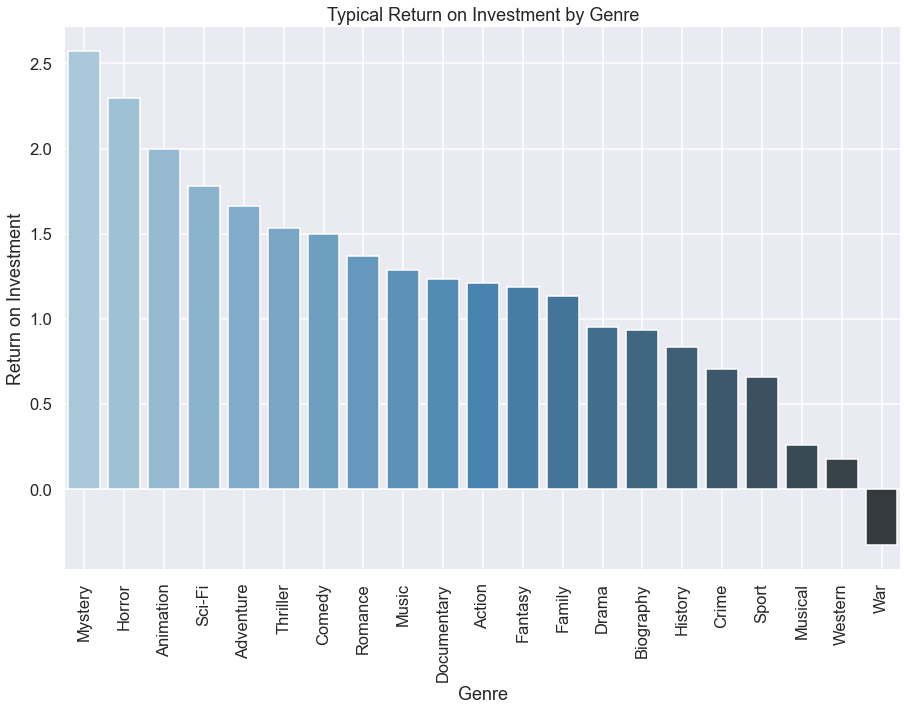

In [33]:
# Define figure/axis
fig, ax = plt.subplots()

# Set Seaborn figure size and style
sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(context='talk')

# Create visual
imdb_tn_meidan = sns.barplot(data=grouped_imdb_tn, x=grouped_imdb_tn.index, y='ROI', ax=ax, palette="Blues_d" )

# Customize asthetic
imdb_tn_meidan.set_xticklabels(imdb_tn_meidan.get_xticklabels(),rotation = 90) # rotate xaxis tick labels
ax.xaxis.grid(True) # Show the vertical gridlines
imdb_tn_meidan.set_title('Typical Return on Investment by Genre')
imdb_tn_meidan.set_xlabel('Genre')
imdb_tn_meidan.set_ylabel('Return on Investment');
plt.tight

Just from this graph it is clear that some genres of movies have a higher return on investment then others. But this doesn't tell the whole story either, let's look at the top 10% and bottom 10% of ROIS and see what their genre is. This will help inform what the best and worst case scenerios may be according to this set.

## 90th percentile ROI by genre

In [35]:
# Group by top 10% and sort by ROI
top_imdb_tn = imdb_tn.groupby('genres').quantile(q=0.9).sort_values('ROI', ascending=False)

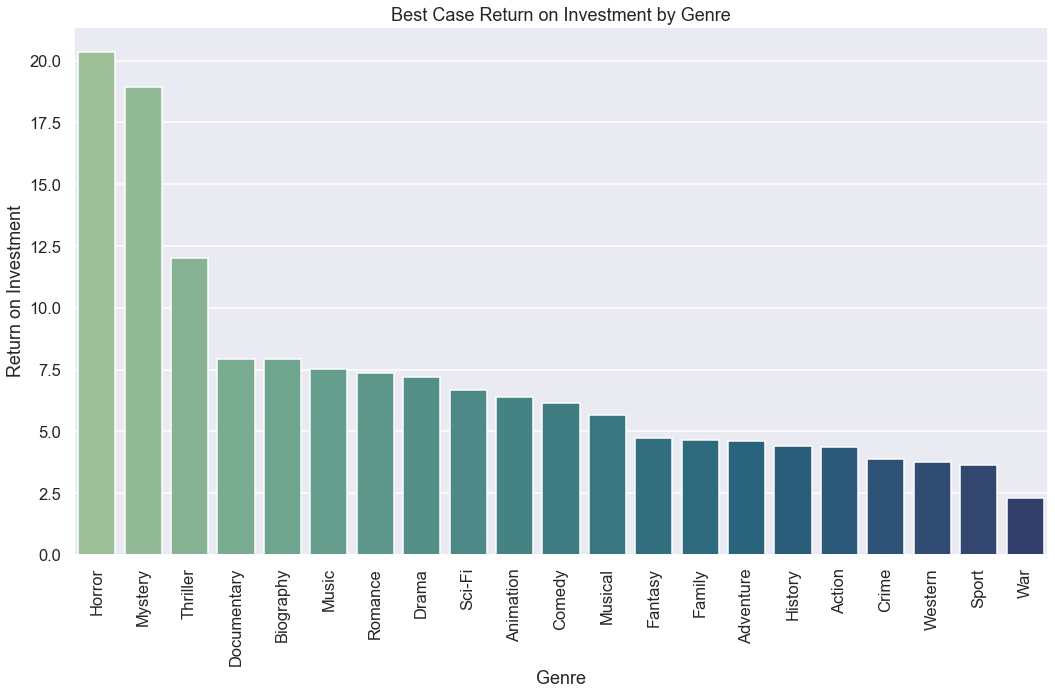

In [36]:
# Create visual
figtop, axtop = plt.subplots()

top = sns.barplot(data=top_imdb_tn, x=top_imdb_tn.index, y='ROI', ax=axtop, palette="crest" )

# Customize asthetic
top.set_xticklabels(top.get_xticklabels(),rotation = 90) # rotate xaxis tick labels
ax.xaxis.grid(True) # Show the vertical gridlines
top.set_title("Best Case Return on Investment by Genre")
top.set_xlabel('Genre')
top.set_ylabel('Return on Investment');


## Worst Performing Movies


In [39]:
# Group by bottom 10% and sort by ROI
bottom_imdb_tn = imdb_tn.groupby('genres').quantile(q=0.1).sort_values('ROI', ascending=False)

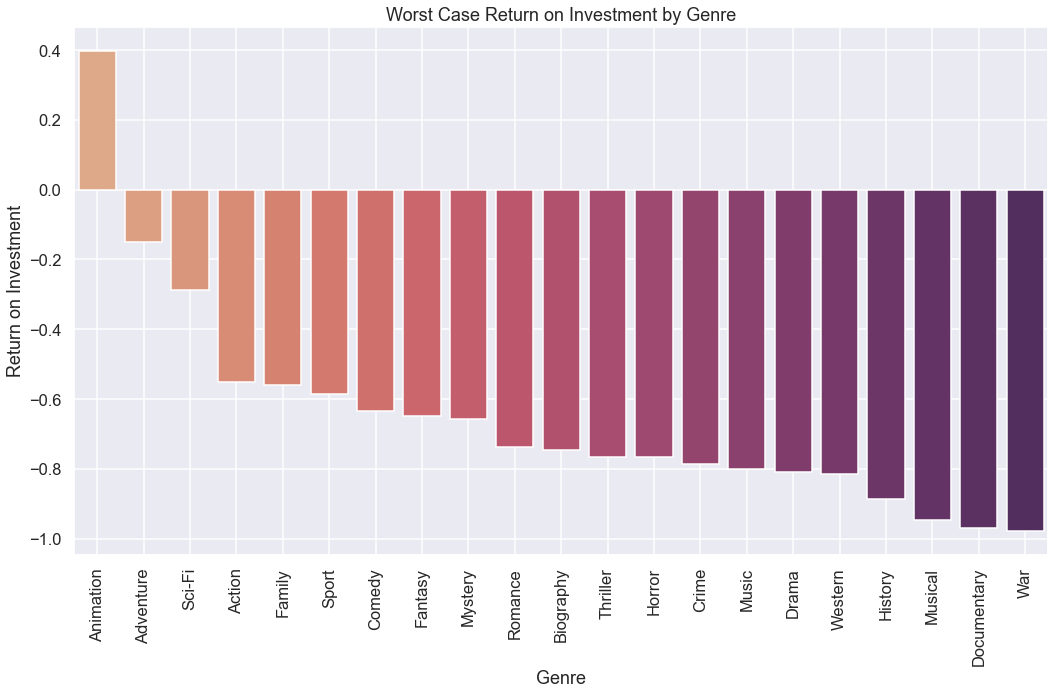

In [40]:
# Create visual
figbot, axbot = plt.subplots()

bot = sns.barplot(data=bottom_imdb_tn, x=bottom_imdb_tn.index, y='ROI', ax=axbot, palette="flare" )

# Customize asthetic
bot.set_xticklabels(bot.get_xticklabels(),rotation = 90) # rotate xaxis tick labels
axbot.xaxis.grid(True) # Show the vertical gridlines
bot.set_title("Worst Case Return on Investment by Genre")
bot.set_xlabel('Genre')
bot.set_ylabel('Return on Investment');

## Analysis

According to our scenario, Microsoft is opening a new movie studio, and we are going to be meeting with the new director of the studio to make recommendations on how to procced.  

The important thing to note is that this is a brand new studio. The team will be newly formed, and will need to get used to working together. They will also need to prove their worth as a team to microsoft as a whole, so it is vitally important that their first project is success.

If we just looked at the "Typical Return on Investment by Genre" graph it might be easy to assume that we should reccomend a horror or thriller movie since they typically have a higher ROI then other genres. The next graph, "Best Case Return on Investment by Genre," also shows that when those kinds of movies do well, they have an extremely high return on investment. However, this is a new movie studio. The chances of them making a knockout film are unrealistic, and because they are a new studio looking to prove themselves, they can't afford to make a mistake. If we take a look at the **worst** case scenario, we can see that when Horror/Thriller movies have a low return on investment they typically have a lower ROI then other genres. In layman's terms, when a horror/thriller performs poorly, it performs **very** poorly.

In this scenario, we would reccomend that Microsoft's new studio make an animated film.

- Animation films typically have a better ROI then other genres
- In the best cases, animation films don't do as well as other genres however,
- Most importantly, in the worst case scenario animation films are the only genre that has a positive ROI.

This is a new studio, they won't be expecting to make a perfect movie on their first project. They will be looking to play it safe, to justify their creation, and to justify future funding. Therefore because animated films do reasonably well across all scenarios the safest choice would to be an animated film.

## Recommendation

**Microsoft's new studio should make an animated film.**

This is a new studio, they won't be expecting to make a perfect movie on their first project. They will be looking to play it safe, to justify their creation, and to justify future funding. Therefore because animated films do reasonably well across all scenarios the safest choice would to be an animated film.

**Making an animated film will typically give a 50% increase to your return on investment**


# Venus Analytics Action Plan For 'Microsoft Studios' Start Up.


## Our action plan was formed around 3 Business Questions.

- What time of year should Microsoft release the majority of their movies? 

- What genre of movies should be their Primary Focus?

- needs to be stated

### Data Exploration Stage

First we need to import the libraries and datesets

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [40]:
!ls Data/zippedData/

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [41]:
# we uses pandas to view our csv datasets as dataframes

bom = pd.read_csv('Data/zippedData/bom.movie_gross.csv.gz')
num = pd.read_csv('Data/zippedData/tn.movie_budgets.csv.gz')
#rt =  pd.read_tsv('Data/zippedData/rt.reviews.tsv.gz')
imdb_title = pd.read_csv('Data/zippedData/imdb.title.basics.csv.gz')
tmdb = pd.read_csv('Data/zippedData/tmdb.movies.csv.gz')
#pd.read_csv('Data/zippedData/')


## Box Office Mojo

In [42]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


###### This table is missing almost 1/3rd of its foreign gross and we are giving microsoft recommendations for global success.

In [43]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [44]:
bom.tail(15)

,title,studio,domestic_gross,foreign_gross,year
3372,Gabriel and the Mountain,Strand,18400.0,NaN,2018
3373,Marlina the Murderer in Four Acts,Icar.,17800.0,NaN,2018
3374,The Escape,IFC,14000.0,NaN,2018
3375,How Victor 'The Garlic' Took Alexey 'The Stud'...,CARUSEL,13000.0,NaN,2018
3376,"Lou Andreas-Salomé, the Audacity to be Free",CLS,12900.0,NaN,2018
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018


###### To make things even worse, this dataset is missing foreign_gross on the more recent movies.  We are trying to tell Microsoft what is trending today.

After looking at our next dataset we decided to just use The Numbers for our financial data.  The only thing that Box Office Mojo has that The Numbers doesn't is the studio name, and that information does not help answer our business question.

### "The Numbers"

Quick glance at our dataset

In [45]:
num.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [46]:
num.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
5773,74,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
5774,75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


##### Right away we notice that our financial data are not integers due to the prescense of  $ signs and commas

In [47]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


##### In order for us to change our financial columns into integers, we must first strip them of their non numeric elements.

In [48]:
# This code removes the '$' from our financial data.

num['worldwide_gross'] = num['worldwide_gross'].str.strip('$')
num['domestic_gross'] = num['domestic_gross'].str.strip('$')
num['production_budget'] = num['production_budget'].str.strip('$')

In [49]:
# Now we remove the commas

num['worldwide_gross'] = num['worldwide_gross'].str.replace(',', '' )
num['domestic_gross'] = num['domestic_gross'].str.replace(',', '')
num['production_budget'] = num['production_budget'].str.replace(',', '')

###### Double check to see if all of our commas and '$' signs are gone.

In [50]:
num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


###### Now our 3 columns can be changed into numeric data

In [51]:
# overwriting our collumns and changing the data type to int.

num['production_budget'] = pd.to_numeric(num['production_budget'])
num['domestic_gross'] = pd.to_numeric(num['domestic_gross'])
num['worldwide_gross'] = pd.to_numeric(num['worldwide_gross'])

In [52]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


### While we have some great financial data here, we still lack financial measurements that show us profit.

###### We can add columns to give us more insight
- Domestic Profit = domestic_gross minus production_budget
- Worldwide Profit = worldwide_gross minus production_budget
- Worldwide ROI = worldwide_profit divided by production_cost
- Domestic Profit Margin = domestic_profit divided by domestic_gross
- Worldwide Profit Margin = worldwide_profit divided by worldwide_gross

In [53]:
num['worldwide_profit'] = num['worldwide_gross'] - num['production_budget']

num['worldwide_ROI']  =  num['worldwide_profit'] / num['production_budget']

num['domestic_profit'] = num['domestic_gross'] - num['production_budget']

num['domestic_profit_margin'] = num['domestic_profit'] / num['domestic_gross']

num['worldwide_profit_margin'] = num['worldwide_profit'] / num['worldwide_gross'] 

###### Check our work

In [54]:
num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,domestic_profit,domestic_profit_margin,worldwide_profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,335507625,0.441163,0.846921
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,-169536125,-0.703283,0.607331
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,-307237650,-7.184770,-1.337036
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,128405868,0.279748,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,303181382,0.488859,0.759251


###### My team and I also agreed on making a month column in order to find out the optimal time of year to release movies.

In [55]:
# str.slice the first 3 elements of the release_date and add that to its own seperate column

num['month'] = num['release_date'].str.slice(stop=3)

In [56]:
num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,domestic_profit,domestic_profit_margin,worldwide_profit_margin,month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,335507625,0.441163,0.846921,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,-169536125,-0.703283,0.607331,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,-307237650,-7.184770,-1.337036,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,128405868,0.279748,0.764364,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,303181382,0.488859,0.759251,Dec


###### We plan on merging our tables, and we have decided that we will create a 'movie_id, set it as the index and merge on that.

In [57]:
#Here our movie_id column consists of both the the name of the movie lowercased followed by the year from release_date.

num['movie_id'] = num['movie'].str.lower() + num['release_date'].str.slice(start=-4)

In [58]:
#We take out trailing and leading white space so that we can have as clean of a merge as possible

num['movie_id'].str.slice()

0                                            avatar2009
1       pirates of the caribbean: on stranger tides2011
2                                      dark phoenix2019
3                           avengers: age of ultron2015
4                 star wars ep. viii: the last jedi2017
                             ...                       
5777                                         red 112018
5778                                      following1999
5779                  return to the land of wonders2005
5780                           a plague so pleasant2015
5781                              my date with drew2005
Name: movie_id, Length: 5782, dtype: object

##### The final step to prepare this table for a merge is to set the month_id column as the index. 

In [59]:
num = num.set_index('movie_id')

In [60]:
num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,domestic_profit,domestic_profit_margin,worldwide_profit_margin,month
movie_id,,,,,,,,,,,,
avatar2009,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,335507625,0.441163,0.846921,Dec
pirates of the caribbean: on stranger tides2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,-169536125,-0.703283,0.607331,May
dark phoenix2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,-307237650,-7.184770,-1.337036,Jun
avengers: age of ultron2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,128405868,0.279748,0.764364,May
star wars ep. viii: the last jedi2017,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,303181382,0.488859,0.759251,Dec


In [61]:
num['domestic_gross'].value_counts()

0           548
8000000       9
2000000       7
7000000       7
10000000      6
           ... 
449865        1
10547117      1
4476235       1
56653         1
40157856      1
Name: domestic_gross, Length: 5164, dtype: int64

In [62]:
num['worldwide_gross'].value_counts()

0            367
8000000        9
7000000        6
2000000        6
4000000        4
            ... 
166000000      1
42843521       1
101173038      1
478595         1
12996          1
Name: worldwide_gross, Length: 5356, dtype: int64

In [63]:
num.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,domestic_profit,domestic_profit_margin,worldwide_profit_margin,month
movie_id,,,,,,,,,,,,
red 112018,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-1.000000,-7000,-inf,-inf,Dec
following1999,79,"Apr 2, 1999",Following,6000,48482,240495,234495,39.082500,42482,0.876243,0.975051,Apr
return to the land of wonders2005,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-0.732400,-3662,-2.736921,-2.736921,Jul
a plague so pleasant2015,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,-1.000000,-1400,-inf,-inf,Sep
my date with drew2005,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,179941,163.582727,179941,0.993924,0.993924,Aug


##### As we can see in the tail of our dataframe, A 0 in the worldwide_gross column causes a '- infinity' in our worldwide_profit_margin table that can skew our data immensely. 

###### After alot of thought my team and I decided that we had no way of deciphering if  these zeroes were real values or place holders.

There are 2 reasons we decided to drop the zeroes in our worldwide_gross column.

- Microsoft is such a huge company with global influence, so we want accurate financial data on Worldwide_ profit
- Secondly a zero in the worldwide_gross column gives us a negative ininity the worldwide_profit margin column


In [64]:
# Here we drop every row where there is a zero in the worldwide_gross column

num.drop(num[num['worldwide_gross'] == 0].index, inplace=True)

In [65]:
num['worldwide_gross'].value_counts()

8000000      9
2000000      6
7000000      6
4000000      4
5000000      4
            ..
42843521     1
101173038    1
478595       1
58545540     1
104267443    1
Name: worldwide_gross, Length: 5354, dtype: int64

In [66]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, avatar2009 to my date with drew2005
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5414 non-null   int64  
 1   release_date             5414 non-null   object 
 2   movie                    5414 non-null   object 
 3   production_budget        5414 non-null   int64  
 4   domestic_gross           5414 non-null   int64  
 5   worldwide_gross          5414 non-null   int64  
 6   worldwide_profit         5414 non-null   int64  
 7   worldwide_ROI            5414 non-null   float64
 8   domestic_profit          5414 non-null   int64  
 9   domestic_profit_margin   5414 non-null   float64
 10  worldwide_profit_margin  5414 non-null   float64
 11  month                    5414 non-null   object 
dtypes: float64(3), int64(6), object(3)
memory usage: 549.9+ KB


###### We still have 5415 entries that we can analyze for trends

#### Visualizations Pre Merge

We know that we will lose some data from a merge, so by doing some visualizations before the merge, we will have a bigger sample size to draw financial data from.

<AxesSubplot:title={'center':'Typical Worldwide Gross'}, xlabel='Months', ylabel='Gross Median'>

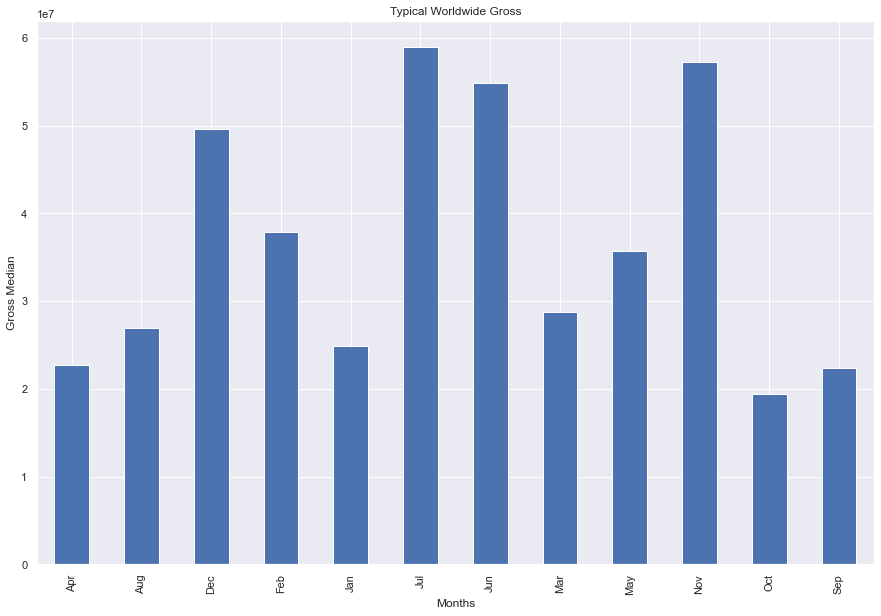

In [67]:
gross_median = num.groupby(['month'])['worldwide_gross'].median()
    
gross_median.plot(kind='bar', title='Typical Worldwide Gross', ylabel='Gross Median',
         xlabel='Months')

<AxesSubplot:title={'center':'Typical Worldwide profit'}, xlabel='Months', ylabel='profit Median'>

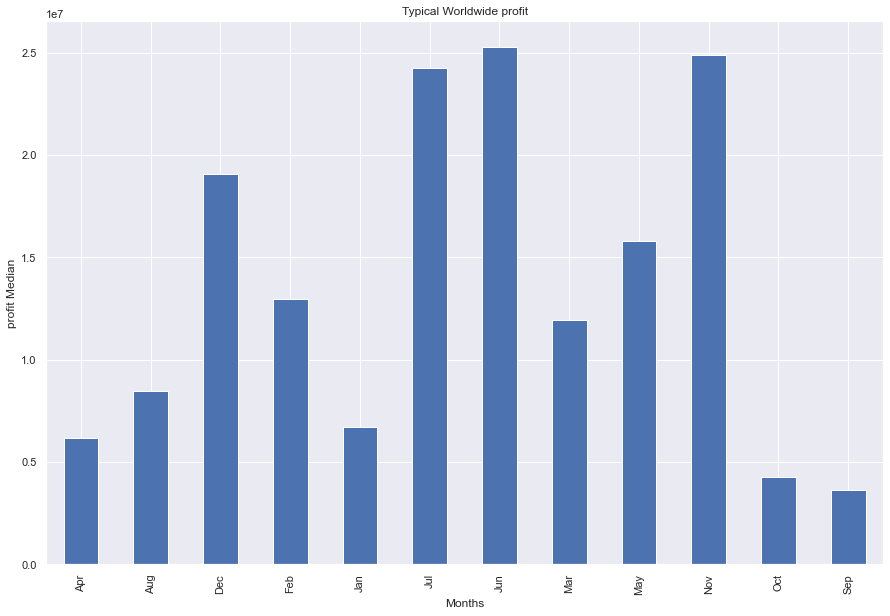

In [68]:
profit_median = num.groupby(['month'])['worldwide_profit'].median()

profit_median.plot(kind='bar', title='Typical Worldwide profit', ylabel='profit Median',
         xlabel='Months')




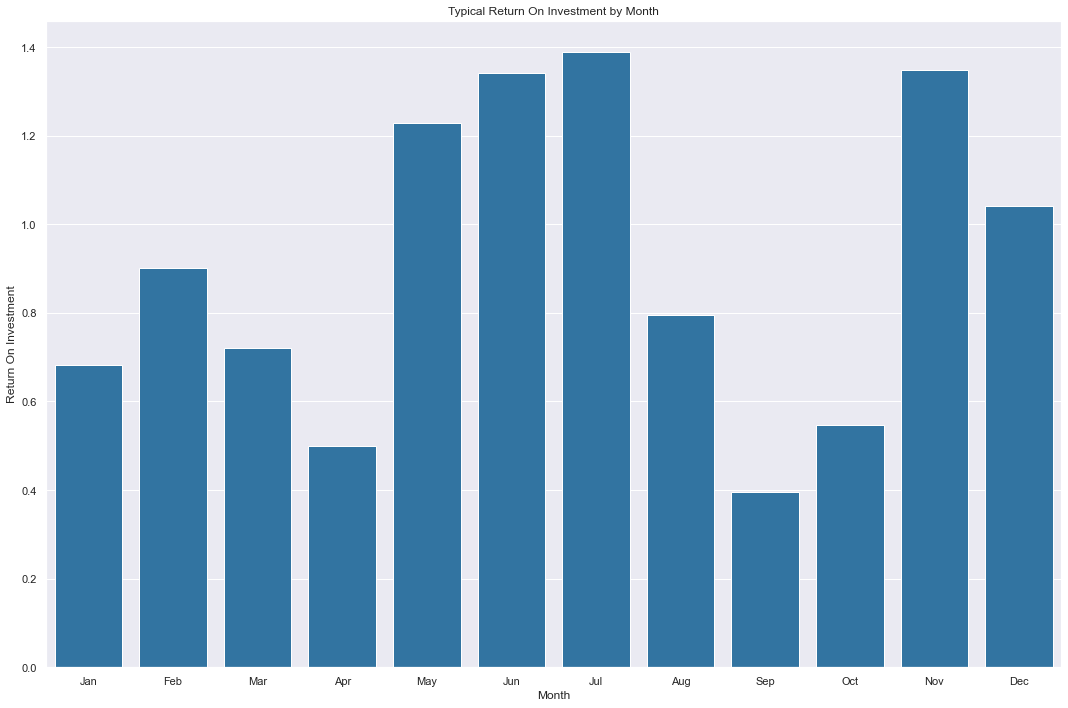

In [87]:
roi_median = num.groupby(['month']).median()


    
month_fig, month_ax = plt.subplots()
sns.set_theme(context='talk')
sns.set(rc={'figure.figsize':(15,10)})

roi_bar = sns.barplot(data= roi_median, x= roi_median.index, y ='worldwide_ROI', color='tab:blue', ax = month_ax, order= [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

roi_bar.set_title('Typical Return On Investment by Month')
roi_bar.set_xlabel('Month')
roi_bar.set_ylabel('Return On Investment');






###### Our first recommendation based on these 3 findings would be to release the bulk of your movies during summer and the Holiday seasons.  These two time periods are consistent over 3 measurements of income.  With a new studio, you would want to justify your profits right away, so it would be wise to follow the release date trend.

# Recommendation - IMDb Data

This notebook will explore the relationship between two features, genre and runtime, and two popularity metrics, viewer rating and the number of viewer ratings. The goal is to find some combination(s) of genre and runtime which provide lift to either of the two popularity metrics.

In [193]:
# load relevant packages and the imdb data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the movie_id column as the index
imdb = pd.read_csv('Data/imdb_data', index_col='movie_id')

In [194]:
# take a look
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43.0
the other side of the wind2018,The Other Side of the Wind,122.0,Drama,6.9,4517.0
sabse bada sukh2018,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13.0
the wandering soap opera2017,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [195]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, sunghursh2013 to chico albuquerque - revelações2013
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   runtime_minutes  114405 non-null  float64
 2   genres           140736 non-null  object 
 3   averagerating    73856 non-null   float64
 4   numvotes         73856 non-null   float64
dtypes: float64(3), object(2)
memory usage: 6.7+ MB


## Data Cleaning

### Drop duplicate movie_id's

In [196]:
# check how many duplicated indices and their identities
print(imdb.index.duplicated().sum())
imdb.index.value_counts()[imdb.index.value_counts() > 1]

2161


ângelo de sousa - tudo o que sou capaz2010    7
split2016                                     6
inside out2011                                5
gone2011                                      4
the unseen2017                                4
                                             ..
foxtrot2017                                   2
transit2010                                   2
olympia2018                                   2
the factory2012                               2
here and now2018                              2
Name: movie_id, Length: 1953, dtype: int64

There are 1,953 movie_ids which are duplicated 2,161 times in total. Let's investigate a few.

In [197]:
imdb.loc['ângelo de sousa - tudo o que sou capaz2010']

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN
ângelo de sousa - tudo o que sou capaz2010,Ângelo de Sousa - Tudo o Que Sou Capaz,60.0,"Biography,Documentary",NaN,NaN


In [198]:
imdb.loc['split2016']

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
split2016,Split,90.0,"Comedy,Romance,Sport",2.9,557.0
split2016,Split,127.0,"Drama,Fantasy",3.6,380.0
split2016,Split,NaN,Crime,6.8,5.0
split2016,Split,117.0,"Horror,Thriller",7.3,358543.0
split2016,Split,80.0,Drama,7.0,21.0
split2016,Split,123.0,"Action,Drama,Sport",5.4,189.0


In [199]:
imdb.loc['inside out2011']

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
inside out2011,Inside Out,93.0,"Crime,Drama",4.6,1566.0
inside out2011,Inside Out,74.0,Documentary,NaN,NaN
inside out2011,Inside Out,NaN,Drama,NaN,NaN
inside out2011,Inside Out,59.0,Family,7.3,15.0
inside out2011,Inside Out,NaN,NaN,NaN,NaN


In [200]:
imdb.loc['reaper2014']

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
reaper2014,Reaper,80.0,Fantasy,NaN,NaN
reaper2014,Reaper,90.0,"Crime,Horror,Sci-Fi",5.1,2772.0


In [201]:
imdb.loc['sacrifice2010']

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sacrifice2010,Sacrifice,67.0,Sci-Fi,5.9,47.0
sacrifice2010,Sacrifice,122.0,"Drama,History",6.2,2029.0


It appears in these cases that one movie has significantly more votes, as indicated by the `numvotes` column, than the others that share a movie_id. This may be because only one of the movies is legitimate and the others are mistaken duplicates. It could also be that there are two or more different movies with the same name that came out the same year. Whatever the case may be, our strategy will be to remove all movie_ids other than the one with the most number of votes. If the movie_id is a mistaken duplicate, we don't want that information leaking into our analysis. If it is not a mistake, we will lose some data on the less popular movies, but that is an acceptable cost given the small number of duplicates and the greater cost of mistaken duplicate information.

In [202]:
# drop rows with missing values in the numvotes column
imdb = imdb.dropna(axis=0, subset=['numvotes'])
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, sunghursh2013 to drømmeland2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   runtime_minutes  66236 non-null  float64
 2   genres           73052 non-null  object 
 3   averagerating    73856 non-null  float64
 4   numvotes         73856 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.4+ MB


In [203]:
# drop duplicate movie_id's if they don't have the max number of votes for that movie_id
max_votes_id = imdb.groupby('movie_id')['numvotes'].transform(max) == imdb['numvotes']
imdb = imdb[max_votes_id]

# check the result
imdb.index.value_counts()

bad & the birdieman2016                        2
arjuna2015                                     2
little heroes2017                              2
the island of doctor moron®2016                1
the philadelphia bicycle vignette story2017    1
                                              ..
matt's chance2013                              1
beyond evil: the dead of night2015             1
farmer of the year2018                         1
gop-stop2011                                   1
american hero2015                              1
Name: movie_id, Length: 73264, dtype: int64

In [204]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73267 entries, sunghursh2013 to drømmeland2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73267 non-null  object 
 1   runtime_minutes  65720 non-null  float64
 2   genres           72475 non-null  object 
 3   averagerating    73267 non-null  float64
 4   numvotes         73267 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.4+ MB


There are still 3 duplicates. Let's check those.

In [205]:
imdb.loc[['bad & the birdieman2016', 'arjuna2015', 'little heroes2017']]

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
bad & the birdieman2016,Bad & the Birdieman,NaN,Documentary,3.2,6.0
bad & the birdieman2016,Bad & the Birdieman,52.0,Documentary,4.7,6.0
arjuna2015,Arjuna,75.0,Drama,6.8,6.0
arjuna2015,Arjuna,NaN,"Action,Crime,Drama",4.8,6.0
little heroes2017,Little Heroes,76.0,Animation,7.6,9.0
little heroes2017,Little Heroes,95.0,"Action,Adventure,Comedy",5.3,9.0


We will drop the two records without a runtime. We will keep both of the "little heroes2017" records. There are in fact two movies from 2017 named "Little Heroes." This is an example of data that might have been lost in the previous drop operation, but we'll keep this time since it could be easily inspected.

In [206]:
# filter the rows to remove those with the selected indices and NaN runtimes
keep_id = ((imdb.index != 'arjuna2015') & (imdb.index != 'bad & the birdieman2016')) | (imdb['runtime_minutes'].notnull())
imdb = imdb[keep_id]

# check result
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73265 entries, sunghursh2013 to drømmeland2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73265 non-null  object 
 1   runtime_minutes  65720 non-null  float64
 2   genres           72473 non-null  object 
 3   averagerating    73265 non-null  float64
 4   numvotes         73265 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.4+ MB


Our cleaned DataFrame has 73,265 entries.

### Unpack Genres

Let's take a look at the genres column.

In [207]:
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43.0
the other side of the wind2018,The Other Side of the Wind,122.0,Drama,6.9,4517.0
sabse bada sukh2018,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13.0
the wandering soap opera2017,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119.0


The genres column contains what appears to be a list of genres. Let's investigate and unpack that using the `explode` method.

In [208]:
type(imdb['genres'][0])

str

Each value in the genres column is actually a string of genres separated by `,`.

In [209]:
# split the genres string on "," into a list of strings
imdb['genres'] = imdb['genres'].str.split(',')

# explode the genres column into rows for each genre
imdb = imdb.explode('genres')

#check result
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,Action,7.0,77.0
sunghursh2013,Sunghursh,175.0,Crime,7.0,77.0
sunghursh2013,Sunghursh,175.0,Drama,7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,Biography,7.2,43.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,Drama,7.2,43.0


In [210]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128305 entries, sunghursh2013 to drømmeland2019
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    128305 non-null  object 
 1   runtime_minutes  118068 non-null  float64
 2   genres           127513 non-null  object 
 3   averagerating    128305 non-null  float64
 4   numvotes         128305 non-null  float64
dtypes: float64(3), object(2)
memory usage: 5.9+ MB


After exploding the `genres` column, there are 128,305 entries.

## Analysis of Number of Votes for Animations

Let's work with our recommendation of animated movies and see how the number of votes is related to runtime.

# (Something about the correlation of number of votes to financial metric.)

In [211]:
# filter animated movies
animated = imdb[imdb['genres'] == 'Animation']

# check info
animated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, joe finds grace2017 to the pilgrim's progress2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1739 non-null   object 
 1   runtime_minutes  1613 non-null   float64
 2   genres           1739 non-null   object 
 3   averagerating    1739 non-null   float64
 4   numvotes         1739 non-null   float64
dtypes: float64(3), object(2)
memory usage: 81.5+ KB


There are 1,739 animated movies, 1,613 of which have a runtime. Let's drop those without one.

In [212]:
# drop animated movies without a runtime
animated = animated.dropna(subset=['runtime_minutes'])

# check
animated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1613 entries, joe finds grace2017 to the pilgrim's progress2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1613 non-null   object 
 1   runtime_minutes  1613 non-null   float64
 2   genres           1613 non-null   object 
 3   averagerating    1613 non-null   float64
 4   numvotes         1613 non-null   float64
dtypes: float64(3), object(2)
memory usage: 75.6+ KB


### Create bins for runtime minutes

The `runtime_minutes` column is currently a continuous variable. We are going to bin this variable to allow for group and barplot creation.

In [214]:
# create bins for runtime
labels = ['<60', 60, 70, 80, 90, 100, 110, 120, 130, 140, '150+']
bins = [0, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, max(animated['runtime_minutes'])]
animated['runtime_bins'] = pd.cut(animated['runtime_minutes'], bins=bins, labels=labels)

# take a look
animated.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,runtime_bins
movie_id,,,,,,
joe finds grace2017,Joe Finds Grace,83.0,Animation,8.1,263.0,80
the tragedy of man2011,The Tragedy of Man,160.0,Animation,7.8,584.0,150+
foodfight!2012,Foodfight!,91.0,Animation,1.9,8248.0,90
quantum quest: a cassini space odyssey2010,Quantum Quest: A Cassini Space Odyssey,45.0,Animation,5.1,287.0,<60
bunyan and babe2017,Bunyan and Babe,84.0,Animation,5.0,302.0,80


In [215]:
animated['runtime_bins'].value_counts().sort_index()

<60     153
60      135
70      326
80      448
90      298
100     134
110      71
120      22
130      14
140       5
150+      7
Name: runtime_bins, dtype: int64

We can see the distribution of bins above. They are relatively equal sized, except for the movies over 2 hours. Let's redo the bins with 120+ as the max bin.

In [216]:
# create bins for runtime
labels = ['<60', 60, 70, 80, 90, 100, 110, '120+']
bins = [0, 60, 70, 80, 90, 100, 110, 120, max(animated['runtime_minutes'])]
animated['runtime_bins'] = pd.cut(animated['runtime_minutes'], bins=bins, labels=labels)

# take a look
animated.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,runtime_bins
movie_id,,,,,,
joe finds grace2017,Joe Finds Grace,83.0,Animation,8.1,263.0,80
the tragedy of man2011,The Tragedy of Man,160.0,Animation,7.8,584.0,120+
foodfight!2012,Foodfight!,91.0,Animation,1.9,8248.0,90
quantum quest: a cassini space odyssey2010,Quantum Quest: A Cassini Space Odyssey,45.0,Animation,5.1,287.0,<60
bunyan and babe2017,Bunyan and Babe,84.0,Animation,5.0,302.0,80


In [217]:
animated['runtime_bins'].value_counts().sort_index()

<60     153
60      135
70      326
80      448
90      298
100     134
110      71
120+     48
Name: runtime_bins, dtype: int64

## Make some graphs!

### Create some helpful functions

The following functions will be used to help make various graphs.

In [218]:
# create function to automate group creation
def create_group(df, groups, aggregation, sortby):
    grouped_df = df.groupby(groups).agg(aggregation).sort_values(sortby, ascending=False)
    return grouped_df

In [219]:
# create function for passing percentiles to create_group function
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    return percentile_

In [268]:
# create function to automate barplot creation
def make_barplot(df, height, title, xlabel, ylabel):
    # define figure/axis
    fig, ax = plt.subplots(figsize=(15,10))
    
    # create visual
    ax = sns.barplot(
        data = df,
        x = df.index,
        y = height,
        color= '#75bbfd'
    )
    
    # set title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # set yticklabels to have ',' in the numbers
    yticklabels = [f'{tick:,.0f}' for tick in ax.get_yticks()]
    ax.set_yticklabels(yticklabels)

    # show the vertical gridlines
    ax.xaxis.grid(True)
    
    plt.tight_layout()
    
    return fig

### Number of Votes by Runtime

In [221]:
# take a look at descriptive statistics
animated['numvotes'].describe()

count      1613.000000
mean       9514.907006
std       47060.914737
min           5.000000
25%          26.000000
50%         121.000000
75%         825.000000
max      682218.000000
Name: numvotes, dtype: float64

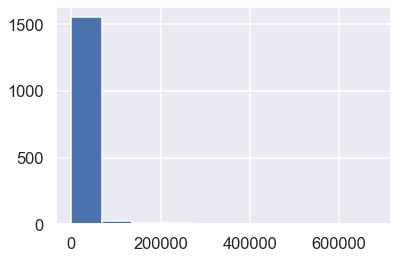

In [222]:
# histogram for number of votes
animated['numvotes'].hist();

We see from the histogram and descriptive statistics that the number of votes is highly skewed. The average will not be a useful metric for analyzing this column. We will use the median and quantiles to describe this feature.

In [273]:
# 90th percentile votes by runtime for animation
animated_rt_90th_votes = create_group(animated, groups='runtime_bins', aggregation=percentile(.9), sortby='numvotes')

# median votes by runtime for animation
animated_rt_median_votes = create_group(animated, groups='runtime_bins', aggregation='median', sortby='numvotes')

# 10th percentile votes by runtime for animation
animated_rt_10th_votes = create_group(animated, groups='runtime_bins', aggregation=percentile(.1), sortby='numvotes')

In [224]:
# set Seaborn style
sns.set_theme(context='talk')

<ipython-input-268-2dcf07cabcc4>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


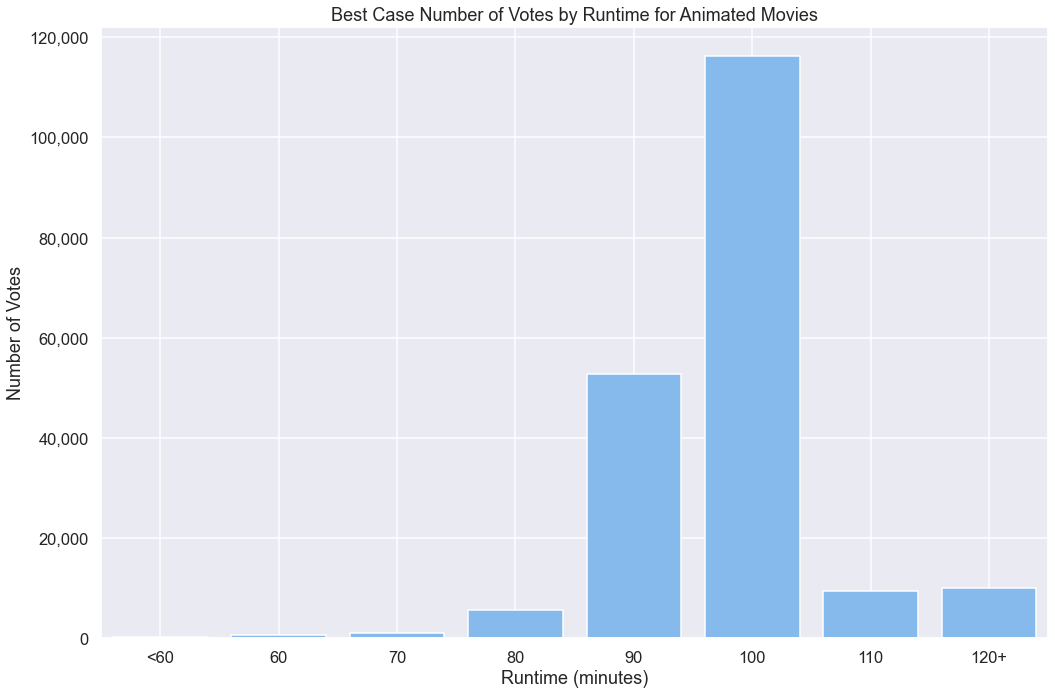

In [305]:
animated_rt_90th_votes_plot = make_barplot(animated_rt_90th_votes,                                               
                                           height='numvotes',
                                           title='Best Case Number of Votes by Runtime for Animated Movies',
                                           xlabel='Runtime (minutes)',
                                           ylabel='Number of Votes'
                                          )
animated_rt_90th_votes_plot.savefig('animation_90th')

<ipython-input-268-2dcf07cabcc4>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


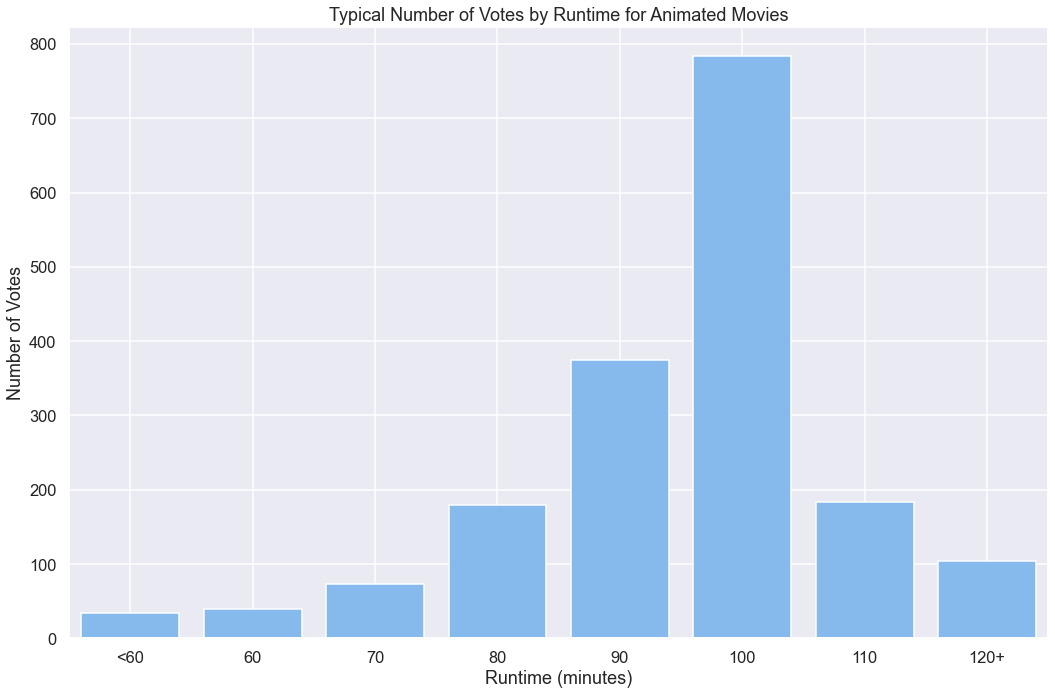

In [303]:
animated_rt_median_votes_plot = make_barplot(animated_rt_median_votes,                                             
                                             height='numvotes',
                                             title='Typical Number of Votes by Runtime for Animated Movies',
                                             xlabel='Runtime (minutes)',
                                             ylabel='Number of Votes'
                                             )

animated_rt_median_votes_plot.savefig('animation_median')

<ipython-input-268-2dcf07cabcc4>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


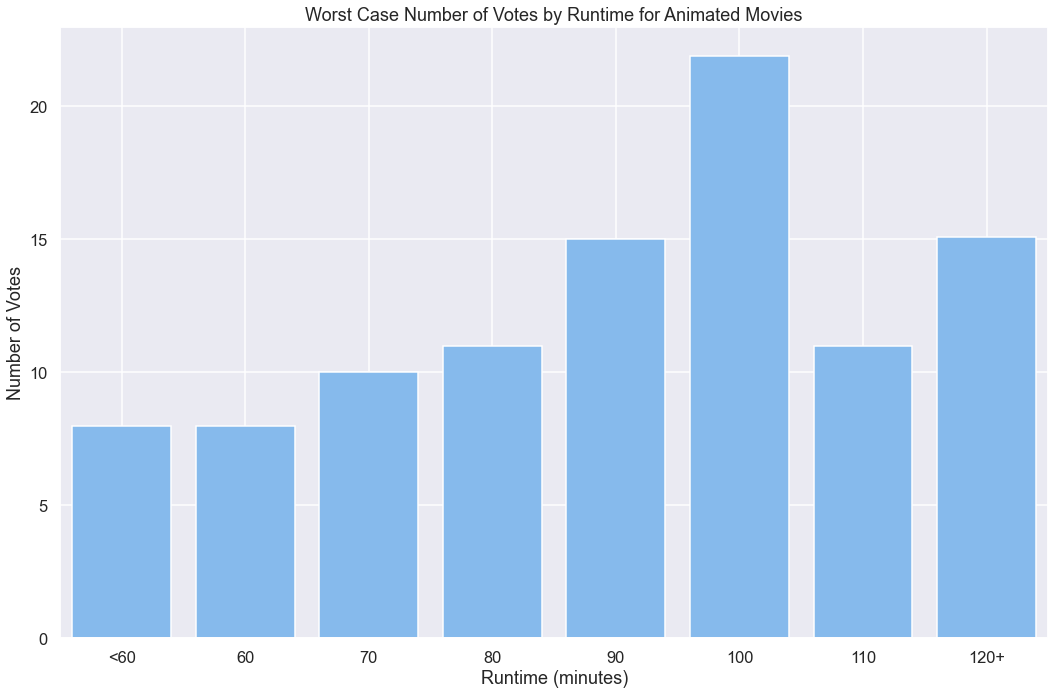

In [304]:
animated_rt_10th_votes_plot = make_barplot(animated_rt_10th_votes,                                               
                                           height='numvotes',
                                           title='Worst Case Number of Votes by Runtime for Animated Movies',
                                           xlabel='Runtime (minutes)',
                                           ylabel='Number of Votes'
                                          )
animated_rt_10th_votes_plot.savefig('animation_10th')

The 100-minute runtime is best in all cases. Next, let's calculate the lift in number of votes we get for a 100-minute movie.

In [299]:
def lift(ingroup, base_rate):
    return ((ingroup / base_rate) - 1) *100

In [300]:
# median number of votes for 100-minute animations
rt_100_median_votes = animated_rt_median_votes.loc[100]['numvotes']

# median number of votes for all animations
rt_median_votes = animated['numvotes'].median()

# lift
median_votes_lift = lift(rt_100_median_votes, rt_median_votes)

print(f'100-minute median: {rt_100_median_votes:.0f}\n' \
      f'overall median: {rt_median_votes:.0f}\n' \
      f'lift: {median_votes_lift:.0f}%')

100-minute median: 784
overall median: 121
lift: 548%


In [301]:
# 90th percentile number of votes for 100-minute animations
rt_100_90th_votes = animated_rt_90th_votes.loc[100]['numvotes']

# 90th percentile number of votes for all animations
rt_90th_votes = animated['numvotes'].quantile(0.9)

# lift
p90th_votes_lift = lift(rt_100_90th_votes, rt_90th_votes)

print(f'100-minute 90th: {rt_100_90th_votes:.0f}\n' \
      f'overall 90th: {rt_90th_votes:.0f}\n' \
      f'lift: {p90th_votes_lift:.0f}%')

100-minute 90th: 116288
overall 90th: 7413
lift: 1469%


In [302]:
# 10th percentile number of votes for 100-minute animations
rt_100_10th_votes = animated_rt_10th_votes.loc[100]['numvotes']

# 10th percentile number of votes for all animations
rt_10th_votes = animated['numvotes'].quantile(0.1)

# lift
p10th_votes_lift = lift(rt_100_10th_votes, rt_10th_votes)

print(f'100-minute 10th: {rt_100_10th_votes:.0f}\n' \
      f'overall 10th: {rt_10th_votes:.0f}\n' \
      f'lift: {p10th_votes_lift:.0f}%')

100-minute 10th: 22
overall 10th: 10
lift: 119%


### Recommendation

**We recommend that the runtime for an animation movie be about 100 minutes.**

The 90th, 50th, and 10th percentile outcome for an animation with a runtime of 100 minutes is superior to its peers.

**Typically, a 100-minute animation increases the number of votes by 548%, or 6.48x.**
**In the best cases, a 100-minute animation yields a 15.69x multiple.**
**Even in the worst cases, a 100-minute animation is 2.29x better than its peers.**